In [1]:
%matplotlib inline
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import brewer2mpl
from io import StringIO

plt.style.use('ggplot')
pd.set_option("display.max_rows", 16)
LARGE_FIGSIZE = (12, 8)

In [2]:
def remove_comments_from_header(fname):
    """ I have made files with comments which means the headings can't be
    parsed to get dictionary headers for pandas! Solution is to remove these
    comments first """
    s = StringIO()
    with open(fname) as f:
        for line in f:
            if '#' in line:
                line = line.replace("#", "").lstrip(' ')
            s.write(line)
    s.seek(0) # "rewind" to the beginning of the StringIO object

    return s

def date_converter(*args): 
    s = str(int(float(args[0]))) + " " + str(int(float(args[1])))
    
    return dt.datetime.strptime(s, '%Y %j')

In [3]:
fn = "gday_met_files/US-NR1.daily_run.csv"
s = remove_comments_from_header(fn)
df = pd.read_csv(s, parse_dates=[[0,1]], skiprows=4, index_col=0,
                 sep=",", keep_date_col=True,
                 date_parser=date_converter)



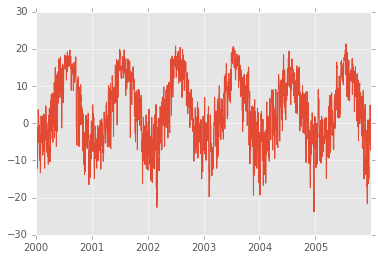

In [4]:
plt.plot(df.tair)

In [5]:
#names = df.columns.values[2:]
names = df.columns.values
names


array(['year', 'doy', 'tair', 'rain', 'tsoil', 'tam', 'tpm', 'tmin',
       'tmax', 'tday', 'vpd_am', 'vpd_pm', 'co2', 'ndep', 'nfix', 'wind',
       'pres', 'wind_am', 'wind_pm', 'par_am', 'par_pm'], dtype=object)

In [6]:
for var in names:
    print(var)
    print(df[var].describe(), end="\n\n")

year
count     2192
unique       6
top       2004
freq       366
Name: year, dtype: object

doy
count     2192
unique     366
top        156
freq         6
Name: doy, dtype: object

tair
count    2192.000000
mean        3.595662
std         8.907055
min       -23.870544
25%        -3.310252
50%         3.362996
75%        11.402170
max        21.336561
Name: tair, dtype: float64

rain
count    2192.000000
mean        1.776587
std         4.498589
min         0.000000
25%         0.000000
50%         0.000000
75%         1.270000
max        52.750000
Name: rain, dtype: float64

tsoil
count    2192.000000
mean        2.471454
std         7.965375
min       -17.044847
25%        -4.280484
50%         2.061583
75%         9.651939
max        17.994229
Name: tsoil, dtype: float64

tam
count    2192.000000
mean        3.026737
std         8.946654
min       -25.612213
25%        -4.027107
50%         2.592814
75%        10.583148
max        21.077868
Name: tam, dtype: float64

tpm
count    2

In [7]:
print(df.doy)

year_doy
2000-01-01      1
2000-01-02      2
2000-01-03      3
2000-01-04      4
2000-01-05      5
2000-01-06      6
2000-01-07      7
2000-01-08      8
             ... 
2005-12-24    358
2005-12-25    359
2005-12-26    360
2005-12-27    361
2005-12-28    362
2005-12-29    363
2005-12-30    364
2005-12-31    365
Name: doy, dtype: object


year
2000    661.830
2001    640.974
2002    484.864
2003    612.936
2004    820.215
2005    673.460
Name: rain, dtype: float64


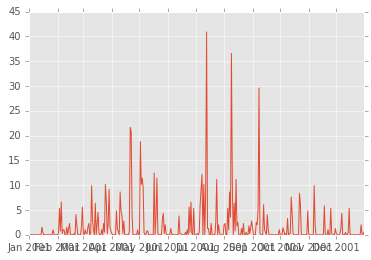

In [24]:
df_yr = df[df.year == "2001"]
plt.plot(df_yr.rain)
print(df.groupby("year").rain.sum())